Importing Necessary Stuff

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading train.csv

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/train.csv")
data

,Id,Code,Blue,Green,Red,NIR
0,0,10,0,0,0,0
1,1,10,1997,1982,1860,3672
2,2,10,1950,1906,1776,3335
3,3,10,1933,1886,1742,3390
4,4,10,2162,2035,2173,3605
...,...,...,...,...,...,...
967000,967000,0,2358,2125,1996,1893
967001,967001,0,2375,2085,1948,1897
967002,967002,0,2356,2044,1952,1877
967003,967003,0,2331,2050,1961,1884


Eliminating trash and outlier values

In [ ]:
#df_filtered = data.query("`Code` != 0 and `Blue` != 0 and `Red` != 0 and `Green` != 0 and `NIR` != 0")
df_filtered = data[(data['Blue'] != 0) & (data['Red'] != 0) & (data['Green'] != 0) & (data['NIR'] != 0)]
df_filtered = df_filtered[df_filtered['Code'] != 0]
df_filtered

,Id,Code,Blue,Green,Red,NIR
1,1,10,1997,1982,1860,3672
2,2,10,1950,1906,1776,3335
3,3,10,1933,1886,1742,3390
4,4,10,2162,2035,2173,3605
5,5,10,2159,2165,2112,3611
...,...,...,...,...,...,...
966990,966990,80,2355,2127,1986,1917
966991,966991,80,2382,2115,2001,1934
966992,966992,80,2398,2146,2011,1965
966993,966993,80,2346,2105,2004,1917


Normalizing the Data

In [ ]:
df_normal = df_filtered.copy()

for column in range(2, len(df_normal.columns)):
  df_normal[df_normal.columns[column]] /= 10000

df_normal

,Id,Code,Blue,Green,Red,NIR
1,1,10,0.1997,0.1982,0.1860,0.3672
2,2,10,0.1950,0.1906,0.1776,0.3335
3,3,10,0.1933,0.1886,0.1742,0.3390
4,4,10,0.2162,0.2035,0.2173,0.3605
5,5,10,0.2159,0.2165,0.2112,0.3611
...,...,...,...,...,...,...
966990,966990,80,0.2355,0.2127,0.1986,0.1917
966991,966991,80,0.2382,0.2115,0.2001,0.1934
966992,966992,80,0.2398,0.2146,0.2011,0.1965
966993,966993,80,0.2346,0.2105,0.2004,0.1917


Adding New Features

In [ ]:
ndvi = (df_normal['NIR'] - df_normal['Red']) / (df_normal['NIR'] + df_normal['Red'])
df_normal = df_normal.assign(NDVI = ndvi)

ndwi = (df_normal['Green'] - df_normal['NIR']) / (df_normal['NIR'] + df_normal['Green'])
df_normal = df_normal.assign(NDWI = ndwi)

evi = 2.5 * (df_normal['NIR'] - df_normal['Red']) / (df_normal['NIR'] + 2.4 * df_normal['Red'] + 1)
df_normal = df_normal.assign(EVI = evi)

intensity = (df_normal['Red'] * 0.2126 + 0.7152 * df_normal['Green'] + 0.0722 * df_normal['Blue'])
df_normal = df_normal.assign(Intensity = intensity)
df_normal

,Id,Code,Blue,Green,Red,NIR,NDVI,NDWI,EVI,Intensity
1,1,10,0.1997,0.1982,0.1860,0.3672,0.327549,-0.298903,0.249779,0.195715
2,2,10,0.1950,0.1906,0.1776,0.3335,0.305028,-0.272658,0.221482,0.188154
3,3,10,0.1933,0.1886,0.1742,0.3390,0.321122,-0.285064,0.234480,0.185878
4,4,10,0.2162,0.2035,0.2173,0.3605,0.247837,-0.278369,0.190221,0.207351
5,5,10,0.2159,0.2165,0.2112,0.3611,0.261926,-0.250346,0.200618,0.215330
...,...,...,...,...,...,...,...,...,...,...
966990,966990,80,0.2355,0.2127,0.1986,0.1917,-0.017679,0.051929,-0.010340,0.211348
966991,966991,80,0.2382,0.2115,0.2001,0.1934,-0.017027,0.044702,-0.010008,0.211004
966992,966992,80,0.2398,0.2146,0.2011,0.1965,-0.011569,0.044028,-0.006849,0.213549
966993,966993,80,0.2346,0.2105,0.2004,0.1917,-0.022188,0.046743,-0.013003,0.210093


Plotting the current data

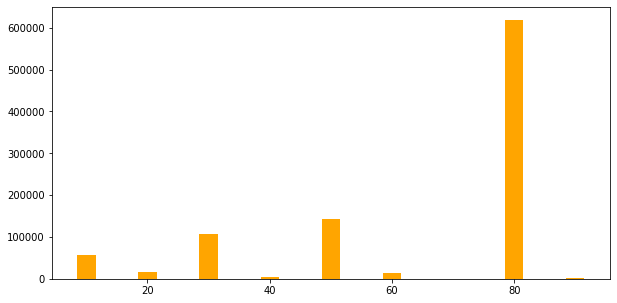

In [ ]:

fig = plt.figure(figsize = (10, 5))
df_normal.Code.value_counts()
plt.bar(df_normal.Code.value_counts().index, df_normal.Code.value_counts().values, color ='orange',
        width = 3)
plt.show()

Defining the X and y

In [ ]:
X = df_normal[['Blue', 'Green', 'Red', 'NIR', 'NDVI', 'NDWI', 'Intensity', 'EVI']]
y = df_normal['Code']

Importing Necessary Stuff

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

Defining some functions that will be training by using different classifiers

In [ ]:
def split_and_train_decision_tree(test_size, random_state, X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)
  tree_clf = DecisionTreeClassifier(random_state = random_state)
  tree_clf.fit(X_train, y_train)
  y_pred_test = tree_clf.predict(X_test)
  return f1_score(y_test, y_pred_test, average = 'weighted')

def split_and_train_random_forest(test_size, random_state, X, y, leaf):
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)
      classifier = RandomForestClassifier(min_samples_leaf=leaf)
      classifier.fit(X_train, y_train)
      y_pred_test = classifier.predict(X_test)
      return f1_score(y_test, y_pred_test, average='weighted')

def split_and_train_knn(test_size, random_state, X, y, k):
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)
      knn = KNeighborsClassifier(n_neighbors=k)
      knn.fit(X_train, y_train)
      y_pred_test = knn.predict(X_test)
      return f1_score(y_test, y_pred_test, average="micro")


Testing Different Methods

In [ ]:

f1_scores = []
for i in np.arange(0.1, 1, 0.1):
  f1_score_ = split_and_train_decision_tree(i, 42, X, y)
  f1_scores.append({'f1_score': f1_score_, 'test_size': i})
  print("test size = %.2f" %i, " , " + "f1_score = ", f1_score_)

print("Maximum f1_score with Decision Tree = ", max(f1_scores, key=lambda x: x['f1_score']))



f1_scores.clear()
for i in np.arange(0.1, 1, 0.1):
  for j in range(1, 30):
    f1_score_ = split_and_train_random_forest(i, 42, X, y, j)
    f1_scores.append({'f1_score': f1_score_, 'test_size': i, 'leaf': j})
    print("test size = %.2f" %i, " , " + "f1_score = ", f1_score_)

print("Maximum f1_score with Random Forest: = ", max(f1_scores, key=lambda x: x['f1_score']))


test size = 0.10  , f1_score =  0.8647031577043182
test size = 0.20  , f1_score =  0.8639034926751337
test size = 0.30  , f1_score =  0.863643198356268
test size = 0.40  , f1_score =  0.8634850464173293
test size = 0.50  , f1_score =  0.8638991333654616
test size = 0.60  , f1_score =  0.8634433677393069
test size = 0.70  , f1_score =  0.8634782457964546
test size = 0.80  , f1_score =  0.8628496580961216
test size = 0.90  , f1_score =  0.8616067451447091
Maximum f1_score with Decision Tree =  0.8647031577043182


'\nf1_scores = []\nfor i in np.arange(0.1, 1, 0.1):\n  f1_score_ = split_and_train_svm(i, 42, X, y)\n  f1_scores.append(f1_score_)\n  print("test size = %.2f" %i, " , " + "f1_score = ", f1_score_)\n\nprint("Maximum f1_score with SVM = ", max(f1_scores))\n'

In [ ]:

f1_scores.clear()
for i in np.arange(0.1, 1, 0.1):
  for j in range(1, 10):
    f1_score_ = split_and_train_knn(i, 42, X, y, j)
    f1_scores.append({'k': j, 'test_size': i, 'f1_score': f1_score_})
    print("test size = %.2f" %i, " , " + "K=", j, "f1_score = ", f1_score_)

print("Maximum f1_score with KNN = ", max(f1_scores, key= lambda x: x['f1_score']))

test size = 0.10  , K= 1 f1_score =  0.8694589190813123
test size = 0.10  , K= 2 f1_score =  0.8716758694278404
test size = 0.10  , K= 3 f1_score =  0.8855059101409939
test size = 0.10  , K= 4 f1_score =  0.8903749132385086
test size = 0.10  , K= 5 f1_score =  0.8939075303794715
test size = 0.10  , K= 6 f1_score =  0.8957929741321261
test size = 0.10  , K= 7 f1_score =  0.897585181655254
test size = 0.10  , K= 8 f1_score =  0.8986832972474593
test size = 0.10  , K= 9 f1_score =  0.8997503340964892
test size = 0.20  , K= 1 f1_score =  0.8680389729458139
test size = 0.20  , K= 2 f1_score =  0.8704165091138887
test size = 0.20  , K= 3 f1_score =  0.8845729499577845
test size = 0.20  , K= 4 f1_score =  0.8887789616538121
test size = 0.20  , K= 5 f1_score =  0.8930574907928747
test size = 0.20  , K= 6 f1_score =  0.8943887038543021
test size = 0.20  , K= 7 f1_score =  0.8961032234003429
test size = 0.20  , K= 8 f1_score =  0.8972997612104198
test size = 0.20  , K= 9 f1_score =  0.8976727080

AttributeError: ignored

Reading test.csv

In [ ]:
data_test = pd.read_csv("/content/drive/MyDrive/test.csv")

Normalizing Data

In [ ]:
df_normal_test = data_test.copy()

for column in range(1, len(df_normal_test.columns)):
  df_normal_test[df_normal_test.columns[column]] /= 10000


df_normal_test

Adding New Features

In [ ]:
ndvi_test = (df_normal_test['NIR'] - df_normal_test['Red']) / (df_normal_test['NIR'] + df_normal_test['Red'])
df_normal_test = df_normal_test.assign(NDVI = ndvi_test)

ndwi_test = (df_normal_test['Green'] - df_normal_test['NIR']) / (df_normal_test['NIR'] + df_normal_test['Green'])
df_normal_test = df_normal_test.assign(NDWI = ndwi_test)
evi = 2.5 * (df_normal_test['NIR'] - df_normal_test['Red']) / (df_normal_test['NIR'] + 2.4 * df_normal_test['Red'] + 1)
df_normal_test = df_normal_test.assign(EVI = evi)

intensity = (df_normal_test['Red'] * 0.2126 + 0.7152 * df_normal_test['Green'] + 0.0722 * df_normal_test['Blue'])
df_normal_test = df_normal_test.assign(Intensity = intensity)
df_normal_test = df_normal_test.fillna(value = 0)
df_normal_test

Defining a function for predicting using best option. (RandomForestClassifier with 0.1 test size and 6 min leafs in out sit.)

In [ ]:
def predict_test(predict_data, leaf, test_size):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 42)
  tree_clf = RandomForestClassifier(min_samples_leaf=leaf)
  tree_clf.fit(X_train, y_train)
  y_predict = tree_clf.predict(predict_data)
  return y_predict

Calling the function we defined

In [ ]:
prediction = predict_test(df_normal_test[['Blue', 'Green', 'Red', 'NIR', 'NDVI', 'NDWI']], 6, 0.1)
print("Test prediction = ", prediction)

Adjusting the data accordingly

In [ ]:
final = df_normal_test[["Id"]].copy()
final = final.assign(Code = prediction)
final

Exporting the final data

In [ ]:
final.to_csv('content/drive/MyDrive/DataCSV/out.csv', index=False)